# COGS 108 - EDA Checkpoint

# Names

- Nilou Shahbandi
- Leonardo Gonzalez
- Brian Chen
- Tin-Trung Pham
- Zhongkang(ken) Fang

<a id='research_question'></a>
# Research Question

*How do different pollutants in California impact the rate of cancer in individuals, and how does pollutants affect rate of Asthma?*

# Setup

In [1]:
## YOUR CODE HERE
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style

import seaborn as sns



In [2]:
aqi_2010 = pd.read_csv('data/aqireport2010.csv')
county_cancer = pd.read_csv('data/countyCancer.csv')
asthma = asthma = pd.read_csv('data/Asthma.csv')

# Data Cleaning

Describe your data cleaning steps here.

In [3]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION

In [4]:
# Data cleaning for AQI_2010

def standardize_region(str_in):
    
    try:
        str_in = str_in.lower()
        str_in = str_in.strip()
        output = str_in

        if 'county, ca' in str_in:
            str_in = str_in.replace('county, ca', '')
            str_in = str_in.strip()
            output = str_in
            
        if 'county' in str_in:
            str_in = str_in.replace('county', '')
            str_in = str_in.strip()
            output = str_in
            
            
    except:
        output = np.nan
        
    return output



In [5]:
# Data cleaning for AQI_2010 continued
aqi_2010.drop(['# Days with AQI', 'Moderate', 'Unhealthy', 'Very Unhealthy', 'County Code',
                'Hazardous', 'AQI Maximum', '# Days CO', '# Days NO2', '# Days O3', '# Days PM2.5', '# Days PM10'  ], 
                 inplace = True, axis=1)
aqi_2010.columns = ['county', 'Good days', 'Unhealthy days', 'AQI 90th Percentile', 'AQI Median']
aqi_2010['county'] = aqi_2010['county'].apply(standardize_region)
aqi_2010.head()

,county,Good days,Unhealthy days,AQI 90th Percentile,AQI Median
0,alameda,245,4,68.0,43.0
1,amador,302,10,64.0,35.0
2,butte,208,13,84.0,47.0
3,calaveras,271,12,84.0,41.0
4,colusa,322,1,49.0,38.0


In [6]:
# Data Cleaning for county_cancer_all
# includes all years
county_cancer_all = pd.read_csv('data/countyCancer.csv')
county_cancer_all = county_cancer_all[county_cancer_all['Age'] == 'All Ages']
county_cancer_all.drop(['Sex', 'Race/Ethnicity', 'Age', 'Stage at Diagnosis', 'Age-adjusted Rate Standard Error',
                         'Age-adjusted Rate Lower Confidence Interval', 'Age-adjusted Rate Upper Confidence Interval'], 
                 inplace = True, axis=1)
county_cancer_all['California Region'] = county_cancer_all['California Region'].apply(standardize_region)
county_cancer_all.columns = ['year','county', 'rate per 100,000', 'count']
county_cancer_all = county_cancer_all[county_cancer_all['rate per 100,000'] != 'a']
county_cancer_all.head()


,year,county,"rate per 100,000",count
0,2010,alameda,44.8118,646
1,2010,butte,63.0616,171
2,2010,contra costa,50.2429,536
3,2010,el dorado,54.2364,124
4,2010,fresno,51.7782,401


In [7]:
# Change string to float and type
county_cancer_all.dtypes
county_cancer_all['rate per 100,000'] = county_cancer_all['rate per 100,000'].astype(float)
county_cancer_all['count'] = county_cancer_all['count'].astype(int)

In [8]:
# Data Cleaning for county_cancer_2010
# filter year 2010
county_cancer_2010 = county_cancer[county_cancer['Year'] == 2010]
county_cancer_2010 = county_cancer_2010[county_cancer_2010['Age'] == 'All Ages']
county_cancer_2010.drop(['Sex', 'Race/Ethnicity', 'Age', 'Stage at Diagnosis', 'Age-adjusted Rate Standard Error', 'Year',
                         'Age-adjusted Rate Lower Confidence Interval', 'Age-adjusted Rate Upper Confidence Interval'], 
                 inplace = True, axis=1)
county_cancer_2010['California Region'] = county_cancer_2010['California Region'].apply(standardize_region)
county_cancer_2010.columns = ['county', 'rate per 100,000', 'count']
county_cancer_2010.head()

,county,"rate per 100,000",count
0,alameda,44.8118,646
1,butte,63.0616,171
2,contra costa,50.2429,536
3,el dorado,54.2364,124
4,fresno,51.7782,401


In [9]:
# change string to float and int
county_cancer_2010.dtypes
county_cancer_2010['rate per 100,000'] = county_cancer_2010['rate per 100,000'].astype(float)
county_cancer_2010['count'] = county_cancer_2010['count'].astype(int)

In [10]:
# combine aqi and cancer data
# year: 2010

# drop the county with combined cancer value
# we drop them instead of taking the average because there are significant differences for the AQI values 
county_cancer_2010 = county_cancer_2010.drop(county_cancer_2010.index[39:47])


aqi_cancer_2010 = pd.merge(county_cancer_2010, aqi_2010, on='county')
aqi_cancer_2010.head()

,county,"rate per 100,000",count,Good days,Unhealthy days,AQI 90th Percentile,AQI Median
0,alameda,44.8118,646,245,4,68.0,43.0
1,butte,63.0616,171,208,13,84.0,47.0
2,contra costa,50.2429,536,307,8,64.0,39.0
3,el dorado,54.2364,124,251,23,93.0,42.0
4,fresno,51.7782,401,99,65,130.0,70.0


In [11]:
def standardize_region(str_in):
    
    try:
        str_in = str_in.lower()
        str_in = str_in.strip()
        output = str_in

        if 'county, ca' in str_in:
            str_in = str_in.replace('county, ca', '')
            str_in = str_in.strip()
            output = str_in
            
        if 'county' in str_in:
            str_in = str_in.replace('county', '')
            str_in = str_in.strip()
            output = str_in
            
            
    except:
        output = np.nan
        
    return output

In [12]:
# data cleaning for asthma 
asthma.columns = asthma.columns.str.lower()

asthma = asthma.rename(columns={"childcount": "child", "percent": "child_percent", "adultcount": "adult",'percent.1': 'adult_percent'})

asthma = asthma.fillna(2018)
asthma["year"] = asthma["year"].astype(int)

In [13]:
asthma.dtypes

state            object
child            object
child_percent    object
year              int64
adult            object
adult_percent    object
dtype: object

In [14]:
# taking out commas and percent signs
asthma['child']= asthma['child'].str.replace(',', '')
asthma['adult']= asthma['adult'].str.replace(',', '')
asthma['child_percent']= asthma['child_percent'].str.replace('%', '')
asthma['adult_percent']= asthma['adult_percent'].str.replace('%', '')

# function to remove empty values
def standardize_asthma(string):
    if string == '---':
        string = np.nan

    return string

In [15]:
asthma['child'] = asthma['child'].apply(standardize_asthma)
asthma = asthma.dropna(subset=['child'])

asthma.head()

,state,child,child_percent,year,adult,adult_percent
0,Alabama,141500,13.20,2014,394600,10.50
2,Arizona,129200,8.10,2016,545100,10.00
4,California,542700,6.20,2018,2607600,8.50
6,Connecticut,62400,9.70,2018,290300,10.30
8,District of Columbia,12700,10.90,2018,66400,11.60


In [16]:
# converting from string to a float
asthma['child']= asthma['child'].astype(float)
asthma['adult']= asthma['adult'].astype(float)
asthma['child_percent']= asthma['child_percent'].astype(float)
asthma['adult_percent']= asthma['adult_percent'].astype(float)
asthma.head()

,state,child,child_percent,year,adult,adult_percent
0,Alabama,141500.0,13.2,2014,394600.0,10.5
2,Arizona,129200.0,8.1,2016,545100.0,10.0
4,California,542700.0,6.2,2018,2607600.0,8.5
6,Connecticut,62400.0,9.7,2018,290300.0,10.3
8,District of Columbia,12700.0,10.9,2018,66400.0,11.6


# Data Analysis & Results (EDA)

Carry out EDA on your dataset(s); Describe in this section

### Descriptive Data Analysis (Asthma)

In [17]:
asthma.describe()

,child,child_percent,year,adult,adult_percent
count,43.000000,43.000000,43.000000,4.300000e+01,43.000000
mean,112609.302326,7.888372,2016.906977,5.018698e+05,9.790698
std,120532.425619,1.756513,1.973804,5.136994e+05,1.268072
min,8800.000000,5.000000,2011.000000,3.810000e+04,7.400000
25%,34900.000000,6.500000,2016.000000,1.663000e+05,8.900000
50%,79600.000000,7.600000,2018.000000,3.833000e+05,9.700000
75%,140350.000000,8.750000,2018.000000,5.761000e+05,10.300000
max,542700.000000,13.200000,2018.000000,2.607600e+06,12.300000


In [18]:
asthma.groupby('year').describe()

child                                                             \
     count           mean            std      min       25%       50%   
year                                                                    
2011   1.0   41600.000000            NaN  41600.0   41600.0   41600.0   
2012   2.0   10850.000000    1202.081528  10000.0   10425.0   10850.0   
2014   4.0  141475.000000   88196.197008  34600.0  113050.0  140350.0   
2015   2.0  317950.000000  316571.705937  94100.0  206025.0  317950.0   
2016   3.0  111266.666667   20643.723824  88700.0  102300.0  115900.0   
2018  31.0  104622.580645  111111.663683   8800.0   32600.0   62400.0   

                         child_percent             ...      adult             \
           75%       max         count       mean  ...        75%        max   
year                                               ...                         
2011   41600.0   41600.0           1.0   5.800000  ...   191000.0   191000.0   
2012   11275.0   11700.0           2.0   7.550000  ...    44775.0    47000.0   
2014  168775.0  250600.0           4.0  10.950000  ...   574275.0   757800.0   
2015  429875.0  541800.0           2.0   8.350000  ...  1258700.0  1572800.0   
2016  122550.0  129200.0           3.0   8.400000  ...   552050.0   559000.0   
2018  148500.0  542700.0          31.0   7.503226  ...   653900.0  2607600.0   

     adult_percent                                                        
             count       mean       std  min    25%    50%     75%   max  
year                                                                      
2011           1.0   7.900000       NaN  7.9  7.900   7.90   7.900   7.9  
2012           2.0   8.450000  0.353553  8.2  8.325   8.45   8.575   8.7  
2014           4.0  10.500000  1.283225  9.4  9.700  10.15  10.950  12.3  
2015           2.0   8.150000  1.060660  7.4  7.775   8.15   8.525   8.9  
2016           3.0   9.966667  0.351188  9.6  9.800  10.00  10.150  10.3  
2018          31.0   9.935484  1.235462  8.0  8.950   9.80  10.750  12.3  

[6 rows x 32 columns]

We can see that the majority of the data pertains to 2018, so if there are differences in asthma rates by year, it's important to keep the differences of the amount of data between years in mind.

### Exploratory Data Analysis (Asthma)

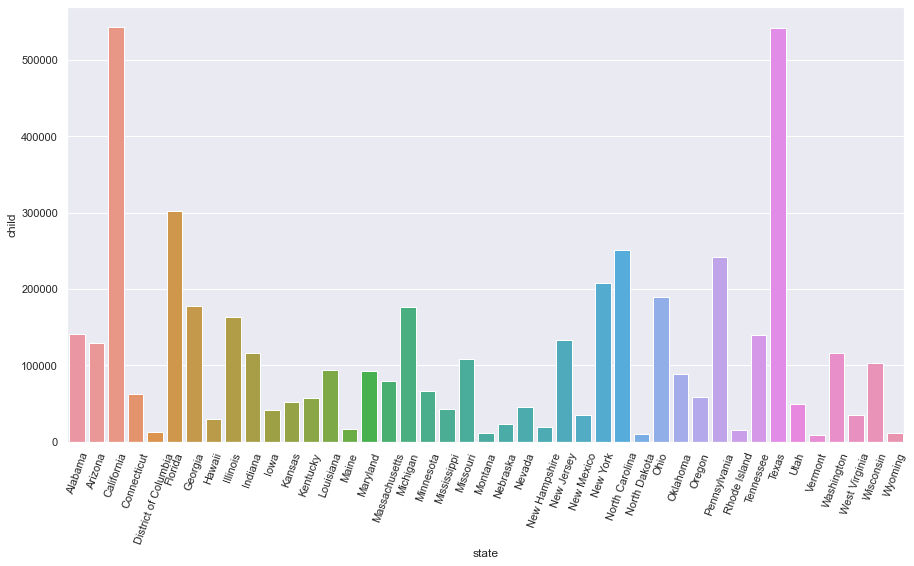

In [19]:
sns.set(rc = {'figure.figsize':(15,8)})
fig1 = sns.barplot(x ='state', y = 'child', data = asthma)
fig1.set_xticklabels(asthma['state'], rotation = 70);

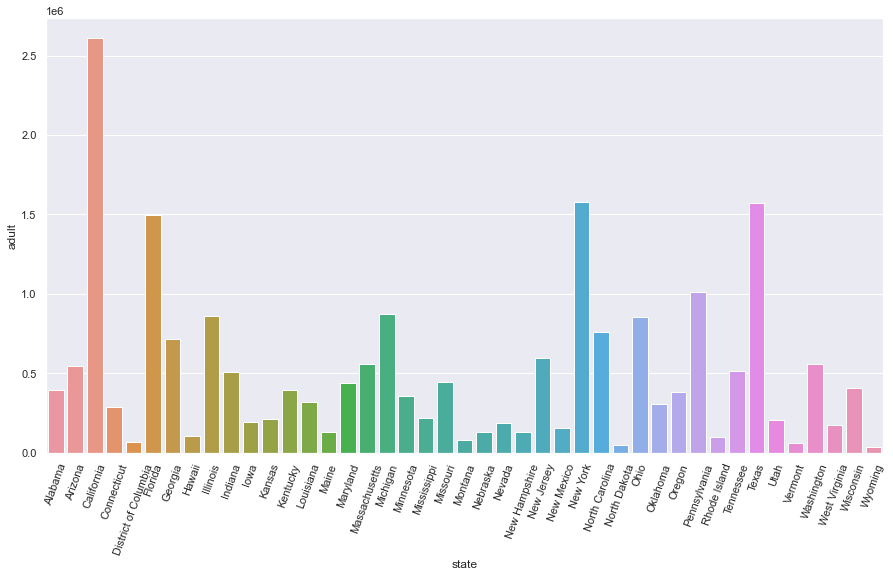

In [20]:
sns.set(rc = {'figure.figsize':(15,8)})
fig2 = sns.barplot(x ='state', y = 'adult', data = asthma)
fig2.set_xticklabels(asthma['state'], rotation = 70);

California and Texas have the highest counts of asthma in both children and adults, followed by New York, Florida, and Michigan. It makes sense that California, Texas, New York, and Florida are among the top, given that they are the four most populous states, but there may more to investigate in Michigan.

<ipython-input-21-a13726c1ebca>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  fig3.set_xticklabels(asthma['year'], rotation = 70);


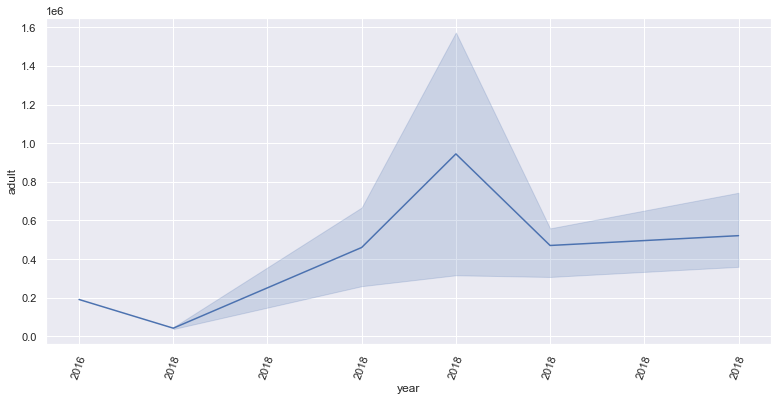

In [21]:
sns.set(rc = {'figure.figsize':(13,6)})
fig3 = sns.lineplot(x ='year',y = 'adult', data = asthma)
fig3.set_xticklabels(asthma['year'], rotation = 70);

<ipython-input-22-a79abd45a091>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  fig4.set_xticklabels(asthma['year'], rotation = 70);


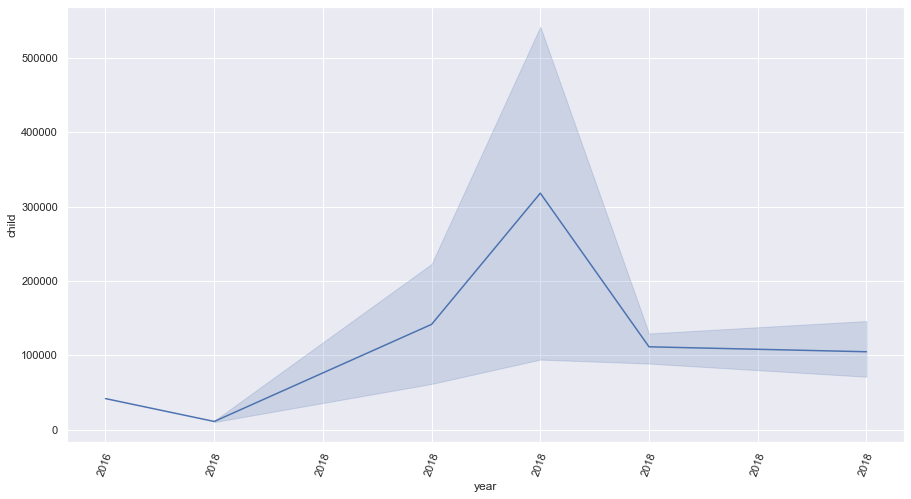

In [22]:
sns.set(rc = {'figure.figsize':(15,8)})
fig4 = sns.lineplot(x ='year',y = 'child', data = asthma)
fig4.set_xticklabels(asthma['year'], rotation = 70);

The graphs show a spike in asthma rates in 2018, but again it's important to remember that most of the data pertained to 2018, which is most likely causing the spike.

### Descriptive Data Analysis (Cancer)

In [23]:
len(county_cancer_all['county'].unique())

47

In this data set from 2010-2018, it lists the rates and counts of lung and bronchus cancer from counties in California. However, due to small sample sizes in certain counties, 47 counties are listed in this dataset.

In [24]:
county_cancer_all.shape

(419, 4)

Also, after cleaning the data, we can see that there are 419 data entries across the 9 years. This should be substantial to see trends across the years in each county.

In [25]:
county_cancer_all.describe()

,year,"rate per 100,000",count
count,419.000000,419.000000,419.000000
mean,2013.990453,46.019919,358.529833
std,2.583515,9.002172,588.653378
min,2010.000000,26.588600,15.000000
25%,2012.000000,39.313750,71.500000
50%,2014.000000,44.755800,152.000000
75%,2016.000000,51.332150,367.000000
max,2018.000000,82.774400,3819.000000


Across these 47 listed counties, we can see that the mean cancer rate is 46.02 cases per 100,000 people. This equates roughly to 349 individuals. It's important to note that there is a smaller standard deviation in the number of cases (9) but a large deviation in the counts (588.65). 

### Exploratory Data Analysis (Cancer)

<AxesSubplot:xlabel='year', ylabel='rate per 100,000'>

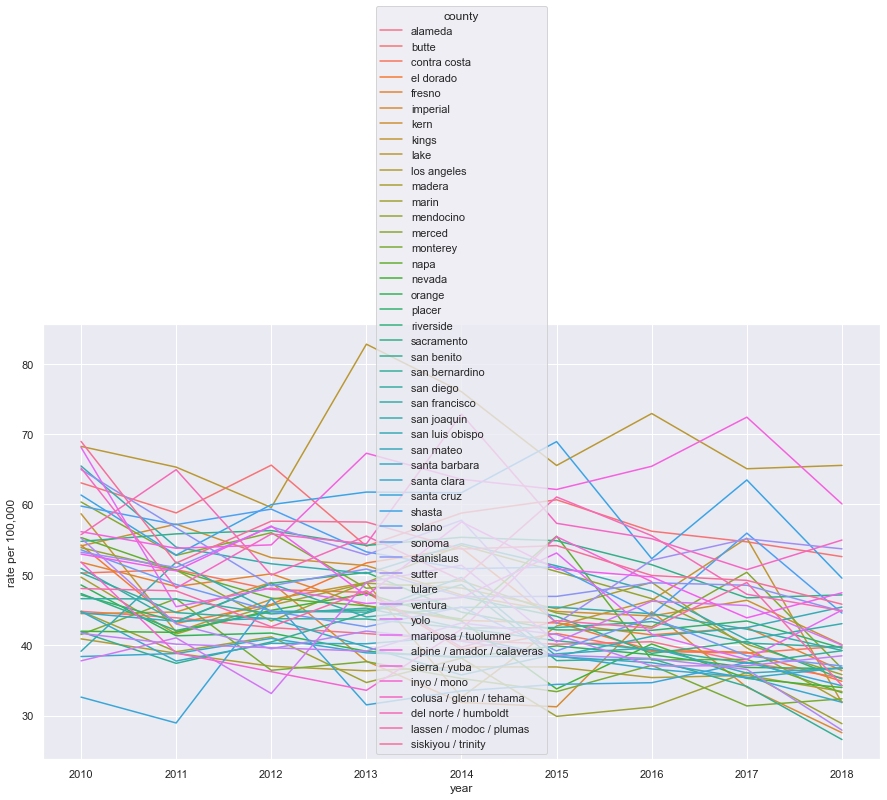

In [26]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.lineplot(x='year', y='rate per 100,000', hue='county', data=county_cancer_all)

It is nice to see that generally across the 47 listed counties, the rates are relatively close. However, in 2013 and 2014 two counties feature abnormally high rates. Lets take a closer look at to which counties those are.

In [27]:
data_2013 = county_cancer_all[county_cancer_all["year"]==2013]
data_2013 = data_2013[data_2013['rate per 100,000'] > 70]
data_2013

,year,county,"rate per 100,000",count
290,2013,lake,82.7744,80


In [28]:
data_2014 = county_cancer_all[county_cancer_all["year"]==2014]
data_2014 = data_2014[data_2014['rate per 100,000'] > 70]
data_2014

,year,county,"rate per 100,000",count
384,2014,lake,76.0176,76
419,2014,colusa / glenn / tehama,72.8328,105


From this, we can see that the Lake county and the combined Colusa/Glenn/Tehama county feature high rates during those years. That will be something useful to explore later on.

<AxesSubplot:xlabel='year', ylabel='count'>

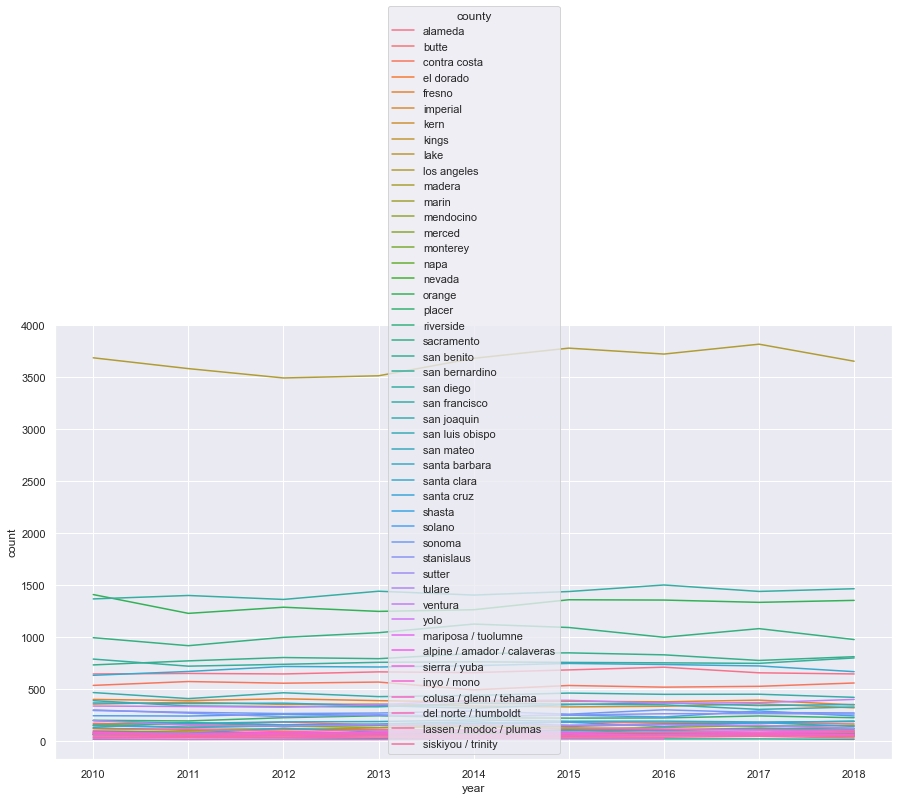

In [29]:
sns.lineplot(x='year', y='count', hue='county', data=county_cancer_all)

From this plot, we can see that there is one county that has a lung and bronchus cancer count that skyrockets far above the other counties. Let's further investigate

In [30]:
data_count = county_cancer_all
data_count = data_count[data_count['count'] > 2500]
data_count

,year,county,"rate per 100,000",count
9,2010,los angeles,40.8923,3688
103,2011,los angeles,38.8553,3584
197,2012,los angeles,37.0027,3494
291,2013,los angeles,36.3578,3515
385,2014,los angeles,36.9159,3683
479,2015,los angeles,36.9024,3781
573,2016,los angeles,35.3922,3724
667,2017,los angeles,35.7070,3819
761,2018,los angeles,33.4156,3655


From here, we can see that it is the Los Angeles county. With a little bit of research, we can find that Los Angeles county features a population size of 10 million people. Three times more than the nex largest county. This might suggest why there are so many more cases, but we will have to investigate further in our analysis.

### Descriptive Data Analysis(AQI)


In [31]:
aqi = pd.read_csv('data/aqireport2010.csv')
aqi.head()

,County Code,County,# Days with AQI,Good,Moderate,Unhealthy for Sensitive Groups,Unhealthy,Very Unhealthy,Hazardous,AQI Maximum,AQI 90th Percentile,AQI Median,# Days CO,# Days NO2,# Days O3,# Days PM2.5,# Days PM10
0,6001,"Alameda County, CA",365,245,115,4,1,.,.,179,68.0,43.0,.,24,135,206,.
1,6005,"Amador County, CA",361,302,48,10,1,.,.,151,64.0,35.0,.,.,361,.,.
2,6007,"Butte County, CA",365,208,144,13,.,.,.,126,84.0,47.0,.,.,264,101,.
3,6009,"Calaveras County, CA",365,271,81,12,1,.,.,154,84.0,41.0,.,.,309,56,.
4,6011,"Colusa County, CA",353,322,30,1,.,.,.,119,49.0,38.0,.,.,305,43,5


<br />
We have a dataset from 53 different counties In California. Across these counties, the mean number of days in the year having AQI value 0 through 50 is 221.9 days. <br /><br />The median AQI value is 45.29. <br />
90% of  daily AQI values during the year were less or equal to 80.59.

<br />

In [32]:
aqi.describe()

,County Code,# Days with AQI,Good,AQI Maximum,AQI 90th Percentile,AQI Median
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000
mean,6057.943396,350.396226,221.943396,305.603774,80.594340,45.292453
std,33.121231,57.358300,93.189719,810.730899,32.567542,15.517185
min,6001.000000,110.000000,31.000000,35.000000,21.000000,9.500000
25%,6029.000000,365.000000,163.000000,119.000000,58.000000,38.000000
50%,6059.000000,365.000000,248.000000,154.000000,80.000000,43.000000
75%,6085.000000,365.000000,295.000000,187.000000,93.000000,50.000000
max,6113.000000,365.000000,358.000000,4466.000000,164.000000,87.000000


### Exploratory Data Analysis(AQI)

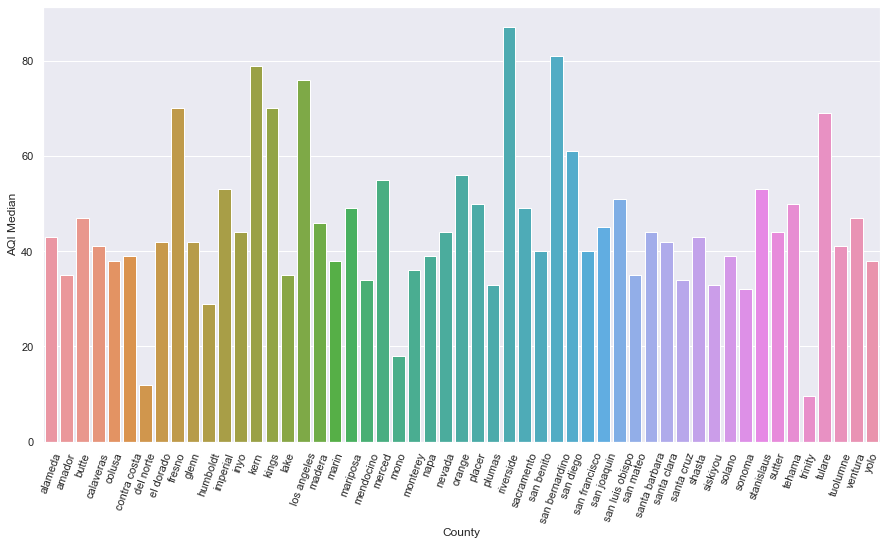

In [33]:
#style.use('fivethirtyeight')
sns.set(rc = {'figure.figsize':(15,8)})
aqi['County'] = aqi['County'].apply(standardize_region)
ax = sns.barplot(x ='County',y = 'AQI Median', data = aqi)
ax.set_xticklabels(aqi['County'], rotation = 70);


The plot we shows that all county have moderate or good AQI value. Some counties have good AQI value (0-50), while some counties have moderate AQI value (50-100).

<ipython-input-45-e06c1504ab9c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aqi_unhealthy['Unhealthy for Sensitive Groups'] = aqi_unhealthy['Unhealthy for Sensitive Groups'].astype(int)


ValueError: The number of FixedLocator locations (43), usually from a call to set_ticks, does not match the number of ticklabels (53).

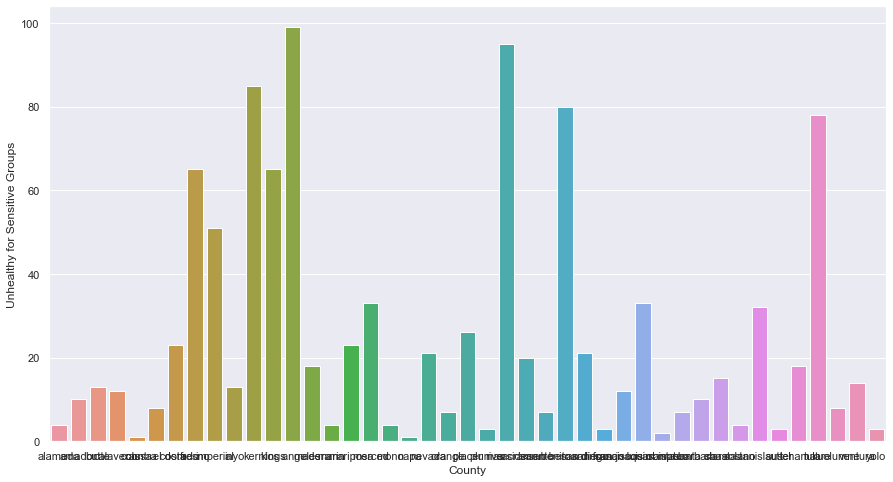

In [45]:
aqi_unhealthy = aqi[aqi['Unhealthy for Sensitive Groups'] != '.']
aqi_unhealthy['Unhealthy for Sensitive Groups'] = aqi_unhealthy['Unhealthy for Sensitive Groups'].astype(int)
ax = sns.barplot(x ='County',y = 'Unhealthy for Sensitive Groups', data = aqi_unhealthy)
ax.set_xticklabels(aqi['County'], rotation = 70);
sns.set(rc = {'figure.figsize':(15,8)})

In the county Inyo, 27% days of a year are unhealthy for sensity group, and in some counties like Siskiyou, colusa etc only have few unhealth days within a year. 